In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = pd.read_csv('trip.csv')

In [5]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [6]:
# Q. info() 메서드를 사용하여 데이터 컬럼명과 자료형을 확인합니다.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


In [7]:
# Q. describe() 메서드를 사용하여 데이터 컬럼별 통계량을 확인합니다.

data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


In [8]:
# Q. 중복 데이터를 확인합니다.

data[data.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [9]:
# Q. 중복 데이터를 확인합니다.
# 위에서 확인한 중복 데이터의 승객명을 [[PASSENGER_NAME]] 대신 넣어주세요.

data[data['passenger_name'].duplicated() == 'Sarah Gross, Lisa Bullock']

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount


In [10]:
# Q. 중복 데이터를 제거합니다.

data = data.drop_duplicates()

In [11]:
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [12]:
data.isna().sum()

passenger_name           0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
payment_method           0
passenger_count          0
trip_distance            0
fare_amount              3
tip_amount               0
tolls_amount             0
dtype: int64

In [13]:
# Q. 전체 데이터 대비 결측치의 비율을 확인합니다.

data.isna().mean()

passenger_name           0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
payment_method           0.000000
passenger_count          0.000000
trip_distance            0.000000
fare_amount              0.000132
tip_amount               0.000000
tolls_amount             0.000000
dtype: float64

In [14]:
# Q. 결측치를 제거합니다.

data = data.dropna()
data

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


In [15]:
data.isna().mean()

passenger_name           0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
payment_method           0.0
passenger_count          0.0
trip_distance            0.0
fare_amount              0.0
tip_amount               0.0
tolls_amount             0.0
dtype: float64

In [16]:
# passenger_count 컬럼의 값을 기준으로 정렬합니다.

data['passenger_count'].sort_values()

12804     0
19458     0
5565      0
5670      0
13718     0
         ..
416       6
4322      6
14500     6
0         6
64       36
Name: passenger_count, Length: 22696, dtype: int64

<Axes: xlabel='None', ylabel='passenger_count'>

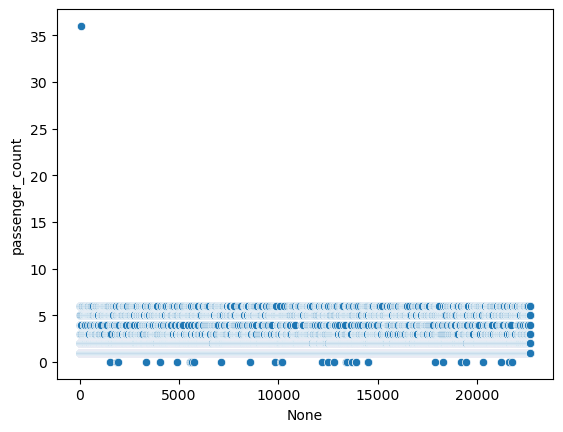

In [17]:
# passenger_count 값의 scatter plot을 그립니다.

sns.scatterplot(x = data.index, y = data['passenger_count'])

In [18]:
# passenger_count 컬럼의 이상치를 제거합니다.
# (passenger_count가 6을 초과하는 경우)

data = data[data['passenger_count'] <= 6]

In [19]:
# passenger_count 컬럼의 이상치를 확인합니다.
# (passenger_count가 0인 경우)

len(data[data['passenger_count'] == 0])

33

In [20]:
# passenger_count 컬럼의 이상치를 제거합니다.

data = data[data['passenger_count'] != 0]

<Axes: xlabel='None', ylabel='passenger_count'>

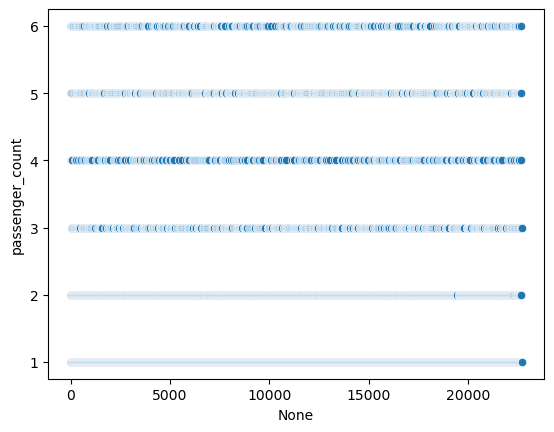

In [21]:
# passenger_count의 scatter plot을 다시 그려봅니다.

sns.scatterplot(x = data.index, y = data['passenger_count'])

<Axes: ylabel='trip_distance'>

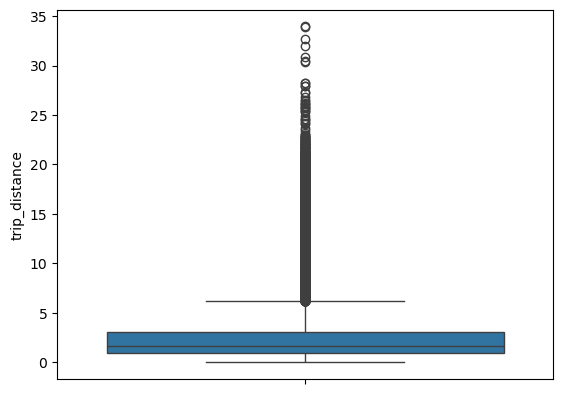

In [22]:
# Q. trip_distance의 이상치를 확인합니다.

sns.boxplot(data['trip_distance'])

In [23]:
# Q. trip_distance의 이상치를 제거합니다.

data=data[data['trip_distance'] < 30]

<Axes: xlabel='trip_distance', ylabel='Count'>

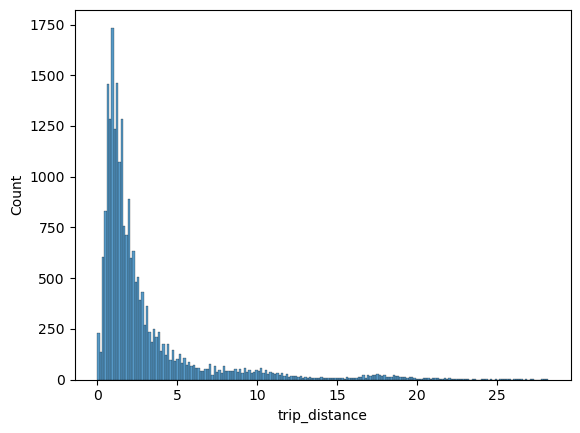

In [24]:
# Q. trip_distance의 히스토그램을 그립니다.

sns.histplot(data=data, x='trip_distance')

In [25]:
data.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22655.000000,22655.000000,22655.000000,22655.000000,22655.000000
mean,1.644670,2.903910,12.989903,1.828503,0.310291
std,1.284532,3.617435,13.094371,2.752996,1.391186
min,1.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.050000,14.500000,2.450000,0.000000
max,6.000000,28.230000,999.990000,200.000000,19.100000


In [26]:
# Q. fare_amount의 이상치 데이터 개수를 확인합니다.
# (fare_amount가 0 이하인 경우)(


count =(data['fare_amount'] <= 0).sum()
count

20

In [27]:
# Q. fare_amount의 이상치를 제거합니다.

data = data[data['fare_amount'] > 0]

In [28]:
data.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
4063,Phillip Gonzalez,08/12/2017 8:49:29 PM,08/12/2017 9:18:50 PM,Cash,4,4.5,0.01,0.00,10.50
14285,Mark Reed,05/03/2017 7:44:28 PM,05/03/2017 7:44:38 PM,Debit Card,1,0.0,0.01,0.00,0.00
13972,Matthew Blake,02/23/2017 9:21:25 AM,02/23/2017 9:21:57 AM,Cash,1,0.0,1.00,0.00,0.00
16343,Jason Cole MD,08/06/2017 2:56:13 PM,08/06/2017 2:56:32 PM,Cash,1,0.1,2.50,0.00,0.00
1077,Kyle Johnson,04/12/2017 8:51:58 PM,04/12/2017 8:52:07 PM,Cash,1,2.3,2.50,0.00,0.00
...,...,...,...,...,...,...,...,...,...
3584,Matthew Chavez,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,Credit Card,1,7.3,152.00,0.00,0.00
12513,Mr. Wesley Reyes,12/17/2017 6:24:24 PM,12/17/2017 6:24:42 PM,Cash,1,0.0,175.00,46.69,11.75
15476,James Dyer MD,06/06/2017 8:55:01 PM,06/06/2017 8:55:06 PM,Debit Card,1,0.0,200.00,11.00,0.00
20314,Nicholas Thomas,12/19/2017 9:40:46 AM,12/19/2017 9:40:55 AM,Cash,2,0.0,450.00,0.00,0.00


In [29]:
# Q. fare_amount의 이상치를 제거합니다.

data = data[data['fare_amount']<400]

<Axes: xlabel='None', ylabel='fare_amount'>

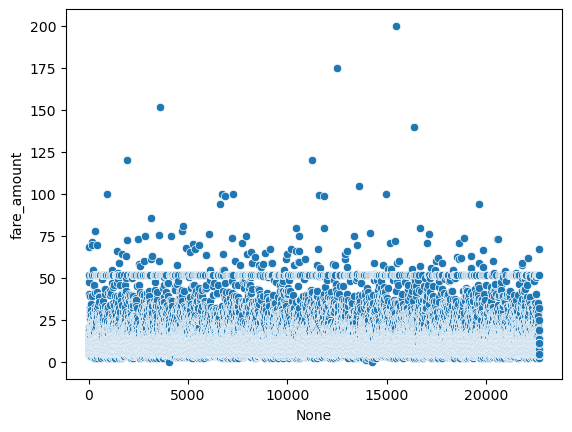

In [30]:
# Q. fare_amount의 scatter plot을 그립니다.

sns.scatterplot(x=data.index, y=data['fare_amount'])

In [31]:
# fare_amount가 150을 초과한다면 150으로 변환합니다.

def fare_func(x):
    if x > 150:
        return 150
    else:
        return x

In [32]:
data['fare_amount'].apply(fare_func)

0        13.0
1        16.0
2         6.5
3        20.5
4        16.5
         ... 
22696     4.0
22697    52.0
22698     4.5
22699    10.5
22700    11.0
Name: fare_amount, Length: 22633, dtype: float64

In [33]:
data['fare_amount'] = data['fare_amount'].apply(lambda x: 150 if x > 150 else x)

In [34]:
data.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
14285,Mark Reed,05/03/2017 7:44:28 PM,05/03/2017 7:44:38 PM,Debit Card,1,0.00,0.01,0.00,0.00
4063,Phillip Gonzalez,08/12/2017 8:49:29 PM,08/12/2017 9:18:50 PM,Cash,4,4.50,0.01,0.00,10.50
13972,Matthew Blake,02/23/2017 9:21:25 AM,02/23/2017 9:21:57 AM,Cash,1,0.00,1.00,0.00,0.00
16829,Jeffrey Jackson,05/02/2017 12:18:59 AM,05/02/2017 12:19:02 AM,Credit Card,1,0.02,2.50,0.00,0.00
15501,Julie Ferguson,12/29/2017 9:06:34 PM,12/29/2017 9:07:19 PM,Cash,1,4.20,2.50,0.00,0.00
...,...,...,...,...,...,...,...,...,...
1930,Cameron Long,06/16/2017 6:30:08 PM,06/16/2017 7:18:50 PM,Debit Card,2,12.50,120.00,5.00,12.50
16381,Erica Hernandez,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,Cash,1,25.50,140.00,0.00,16.26
15476,James Dyer MD,06/06/2017 8:55:01 PM,06/06/2017 8:55:06 PM,Debit Card,1,0.00,150.00,11.00,0.00
12513,Mr. Wesley Reyes,12/17/2017 6:24:24 PM,12/17/2017 6:24:42 PM,Cash,1,0.00,150.00,46.69,11.75


In [35]:
data.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
14285,Mark Reed,05/03/2017 7:44:28 PM,05/03/2017 7:44:38 PM,Debit Card,1,0.00,0.01,0.00,0.00
4063,Phillip Gonzalez,08/12/2017 8:49:29 PM,08/12/2017 9:18:50 PM,Cash,4,4.50,0.01,0.00,10.50
13972,Matthew Blake,02/23/2017 9:21:25 AM,02/23/2017 9:21:57 AM,Cash,1,0.00,1.00,0.00,0.00
16829,Jeffrey Jackson,05/02/2017 12:18:59 AM,05/02/2017 12:19:02 AM,Credit Card,1,0.02,2.50,0.00,0.00
15501,Julie Ferguson,12/29/2017 9:06:34 PM,12/29/2017 9:07:19 PM,Cash,1,4.20,2.50,0.00,0.00
...,...,...,...,...,...,...,...,...,...
1930,Cameron Long,06/16/2017 6:30:08 PM,06/16/2017 7:18:50 PM,Debit Card,2,12.50,120.00,5.00,12.50
16381,Erica Hernandez,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,Cash,1,25.50,140.00,0.00,16.26
15476,James Dyer MD,06/06/2017 8:55:01 PM,06/06/2017 8:55:06 PM,Debit Card,1,0.00,150.00,11.00,0.00
12513,Mr. Wesley Reyes,12/17/2017 6:24:24 PM,12/17/2017 6:24:42 PM,Cash,1,0.00,150.00,46.69,11.75


<Axes: xlabel='None', ylabel='tip_amount'>

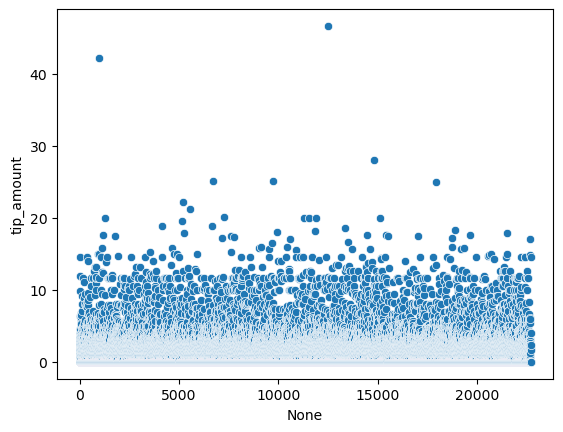

In [36]:
# Q. tip_amount의 scatter plot을 그립니다.

sns.scatterplot(x=data.index, y=data['tip_amount'])

In [37]:
# Q. tip_amount의 이상치를 확인합니다.

count = (data['tip_amount'] >= 40).sum()
count

2

In [38]:
# Q. tip_amount의 이상치를 제거합니다.

data = data[data['tip_amount']< 40]

In [39]:
len(data)

22631

<Axes: xlabel='None', ylabel='tolls_amount'>

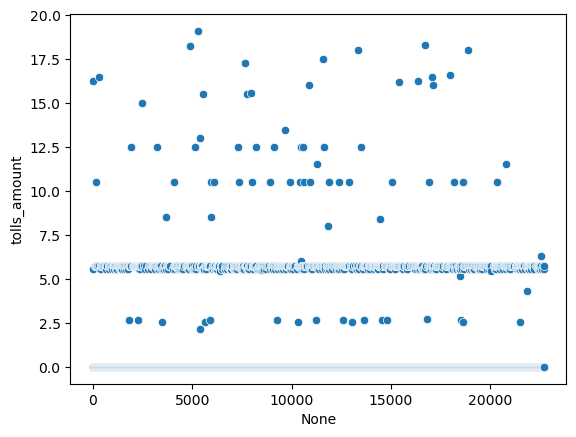

In [40]:
# Q. tolls_amount의 scatter plot을 그립니다.

sns.scatterplot(x=data.index, y=data['tolls_amount'])

In [41]:
data.head(30)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.00,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.00,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.50,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.50,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.50,0.00,0.00
5,Justin Smith,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,Debit Card,6,2.30,9.00,2.06,0.00
6,Tonya Moreno,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,Cash,1,12.83,47.50,9.86,0.00
7,Hannah Foley,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,Debit Card,1,2.98,16.00,1.78,0.00
8,Katie Whitney,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,Cash,1,1.20,9.00,0.00,0.00
9,Amanda Jones,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,Cash,1,1.60,13.00,2.75,0.00


In [42]:
# payment_method 컬럼에 어떤 값들이 있는지 살펴봅시다.

data['payment_method'].unique()

array(['Debit Card', 'Cash', 'Credit Card'], dtype=object)

In [43]:
data['payment_method'].nunique()

3

In [44]:
data['payment_method'].value_counts()

payment_method
Cash           11162
Debit Card      5763
Credit Card     5706
Name: count, dtype: int64

In [45]:
# Q. 'Debit Card'와 'Credit Card' 항목을 'Card'로 변환합니다. 
# (힌트: replace() 메서드를 사용합니다.)

data['payment_method'] = data['payment_method'].replace({"Debit Card":"Card", "Credit Card":"Card"})

In [46]:
data['payment_method'].value_counts()

payment_method
Card    11469
Cash    11162
Name: count, dtype: int64

In [47]:
example = 'Susan Robinson'

In [48]:
example.split()

['Susan', 'Robinson']

In [49]:
# Q. passenger_name을 성과 이름으로 분리하여 성 부분만 passenger_first_name 컬럼으로 저장합니다.

data['passenger_first_name'] = data['passenger_name'].str.split()[-1:0]

In [50]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Card,6,3.34,13.0,2.76,0.0,NaN
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Card,1,1.80,16.0,4.00,0.0,NaN
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Card,1,1.00,6.5,1.45,0.0,NaN
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0,NaN
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Card,1,4.37,16.5,0.00,0.0,NaN


In [51]:
# Q. tpep_pickup_datetime 컬럼의 object 자료형을 datetime으로 변환합니다.

data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])

In [52]:
# Q. tpep_dropoff_datetime 컬럼의 object 자료형을 datetime으로 변환합니다.

data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

In [53]:
# Q. 하차 시각과 승차 시각의 차이를 travel_time 컬럼으로 저장합니다.

data['travel_time'] = data['tpep_pickup_datetime'] - data['tpep_dropoff_datetime']

In [54]:
data.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,NaN,-1 days +23:45:56
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,NaN,-1 days +23:33:30
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,NaN,-1 days +23:52:48
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,NaN,-1 days +23:29:45
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,NaN,-1 days +23:43:17


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22631 entries, 0 to 22700
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   passenger_name         22631 non-null  object         
 1   tpep_pickup_datetime   22631 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  22631 non-null  datetime64[ns] 
 3   payment_method         22631 non-null  object         
 4   passenger_count        22631 non-null  int64          
 5   trip_distance          22631 non-null  float64        
 6   fare_amount            22631 non-null  float64        
 7   tip_amount             22631 non-null  float64        
 8   tolls_amount           22631 non-null  float64        
 9   passenger_first_name   0 non-null      object         
 10  travel_time            22631 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(3), timedelta64[ns](1)
memory usage: 2.1+ MB


In [56]:
# Q. travel_time 컬럼의 데이터를 초 단위로 변환합니다.

data['travel_time'] =data['travel_time'].dt.total_seconds()
